### Solar Power Generation
#### Analyst: Kaival Panchal

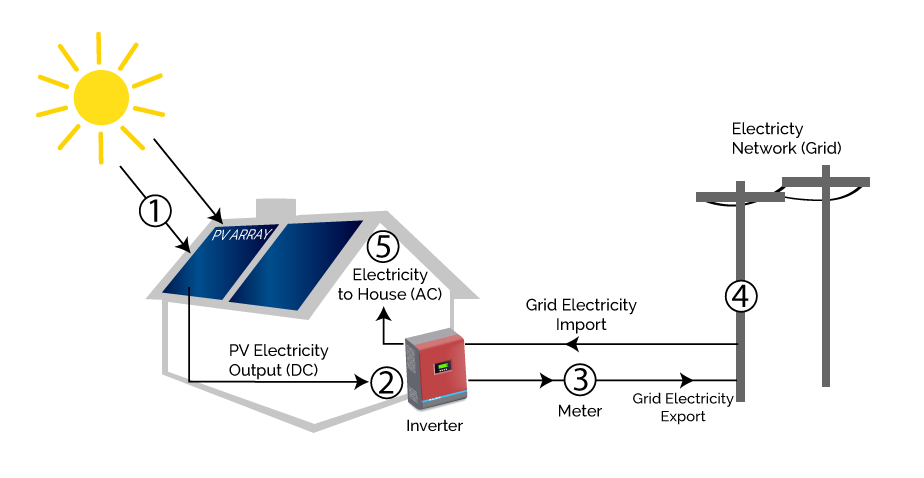

This data has been gathered at two solar power plants in India over a 34 day period. It has two pairs of files - each pair has one power generation dataset and one sensor readings dataset. The power generation datasets are gathered at the inverter level - each inverter has multiple lines of solar panels attached to it. The sensor data is gathered at a plant level - single array of sensors optimally placed at the plant.

There are a few areas of concern at the solar power plant -
1.  Is there any missing data and are all the data types correct?
2.	How many inverters (source_key) are there for each plant?
3.	Rank the inverters (source_key) based on the DC/AC power they produce
4.	Which inverter (source_key) has produced maximum DC/AC power?
5.	What is the maximum/minimum amount of DC/AC Power generated in a time interval/day?
5.  Which Month was the best?
5.  What was the maximim power generation per day on average and what time did it occur?
5.  Which day in May and June were the best?
7.	What is the total irradiation per day? Relationship Betweeen Irradiation and Output?
3.	Can we identify faulty or suboptimally performing equipment?


#### 1. Import Libraries.  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 2. Read Data CSV's into Pandas Dataframe. 

In [2]:
# P1 = Plant 1, P2 = Plant 2, WP1= Weather Data Plant 1 WP2= Weather Data Plant 2
P1 = pd.read_csv("Plant_1_Generation_Data.csv")
WP1= pd.read_csv('Plant_1_Weather_Sensor_Data.csv')
P2 = pd.read_csv("Plant_2_Generation_Data.csv")
WP2= pd.read_csv('Plant_2_Weather_Sensor_Data.csv')


#### 3. Check Data Frames, Ensure everything converted properly 

In [3]:
P1

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,17-06-2020 23:45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,17-06-2020 23:45,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,17-06-2020 23:45,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,17-06-2020 23:45,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


In [4]:
P2

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07
...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.000000,5.207580e+05
67694,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.000000,1.211314e+08
67695,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.000000,2.427691e+06
67696,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08


In [5]:
WP1

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


In [6]:
WP2

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0
...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,4136001,iq8k7ZNt4Mwm3w0,23.511703,22.856201,0.0
3255,2020-06-17 23:00:00,4136001,iq8k7ZNt4Mwm3w0,23.482282,22.744190,0.0
3256,2020-06-17 23:15:00,4136001,iq8k7ZNt4Mwm3w0,23.354743,22.492245,0.0
3257,2020-06-17 23:30:00,4136001,iq8k7ZNt4Mwm3w0,23.291048,22.373909,0.0


#### 4. Check Data Types and Null Values. 

In [7]:
print("_____Plant 1_____")
print(P1.info())
print("_____Plant 2_____")
print(P2.info())
print("_____Weather of Plant 1_____")
print(WP1.info())
print("_____Weather of Plant 2_____")
print(WP2.info())

_____Plant 1_____
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB
None
_____Plant 2_____
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  int64  
 2   SOURCE_KEY   67698 non-null  object 
 3   DC_POWER     67698 non-null  float64
 4   AC_POWER     67698 non-null  float64
 5   DAIL

######     Notes. All data types are correct and there are no Null Values. Datatypes might change based on Applications.  

#### 5. Extract  Date and Time Column from DATE_TIME column, no need for Year since we know it is 2020. 

In [8]:
#Plant 1 
P1["Month"] = P1['DATE_TIME'].astype(str).str[3:5]
P1["DAY"] = P1["DATE_TIME"].str[0:2]
P1["Date"]= P1['Month'] + '-' + P1['DAY']
P1['Time'] = P1["DATE_TIME"].astype(str).str[10:16]

#Plant 2
P2["Month"] = P2['DATE_TIME'].astype(str).str[5:7]
P2["DAY"] = P2["DATE_TIME"].str[8:10]
P2["Date"]= P2['Month'] + '-' + P1['DAY']
P2['Time'] = P2["DATE_TIME"].astype(str).str[10:16]
P2

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,Month,DAY,Date,Time
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,05,15,05-15,00:00
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,05,15,05-15,00:00
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,05,15,05-15,00:00
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,05,15,05-15,00:00
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,05,15,05-15,00:00
...,...,...,...,...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.000000,5.207580e+05,06,17,06-17,23:45
67694,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.000000,1.211314e+08,06,17,06-17,23:45
67695,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.000000,2.427691e+06,06,17,06-17,23:45
67696,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08,06,17,06-17,23:45


In [9]:
P1

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,Month,DAY,Date,Time
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,05,15,05-15,00:00
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,05,15,05-15,00:00
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,05,15,05-15,00:00
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,05,15,05-15,00:00
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,05,15,05-15,00:00
...,...,...,...,...,...,...,...,...,...,...,...
68773,17-06-2020 23:45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,06,17,06-17,23:45
68774,17-06-2020 23:45,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,06,17,06-17,23:45
68775,17-06-2020 23:45,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,06,17,06-17,23:45
68776,17-06-2020 23:45,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,06,17,06-17,23:45


#### 7. How many inverters (source_key) are there for each plant?

In [10]:
# find unique inverters by id #
INP1 = np.unique(P1['SOURCE_KEY'])
INP2 = np.unique(P2['SOURCE_KEY'])
print('The number of inverters in Plant 1 is ' + str(len(INP1)))
print('The number of inverters in Plant 2 is ' + str(len(INP2)))
print(INP1)
print(INP2)


The number of inverters in Plant 1 is 22
The number of inverters in Plant 2 is 22
['1BY6WEcLGh8j5v7' '1IF53ai7Xc0U56Y' '3PZuoBAID5Wc2HD' '7JYdWkrLSPkdwr4'
 'McdE0feGgRqW7Ca' 'VHMLBKoKgIrUVDU' 'WRmjgnKYAwPKWDb' 'YxYtjZvoooNbGkE'
 'ZnxXDlPa8U1GXgE' 'ZoEaEvLYb1n2sOq' 'adLQvlD726eNBSB' 'bvBOhCH3iADSZry'
 'iCRJl6heRkivqQ3' 'ih0vzX44oOqAx2f' 'pkci93gMrogZuBj' 'rGa61gmuvPhdLxV'
 'sjndEbLyjtCKgGv' 'uHbuxQJl8lW7ozc' 'wCURE6d3bPkepu2' 'z9Y9gH1T5YWrNuG'
 'zBIq5rxdHJRwDNY' 'zVJPv84UY57bAof']
['4UPUqMRk7TRMgml' '81aHJ1q11NBPMrL' '9kRcWv60rDACzjR' 'Et9kgGMDl729KT4'
 'IQ2d7wF4YD8zU1Q' 'LYwnQax7tkwH5Cb' 'LlT2YUhhzqhg5Sw' 'Mx2yZCDsyf6DPfv'
 'NgDl19wMapZy17u' 'PeE6FRyGXUgsRhN' 'Qf4GUc1pJu5T6c6' 'Quc1TzYxW2pYoWX'
 'V94E5Ben1TlhnDV' 'WcxssY2VbP4hApt' 'mqwcsP2rE7J0TFp' 'oZ35aAeoifZaQzV'
 'oZZkBaNadn6DNKz' 'q49J1IKaHRwDQnt' 'rrq4fwE8jgrTyWY' 'vOuJvMaM2sgwLmb'
 'xMbIugepa2P7lBB' 'xoJJ8DcxJEcupym']


#### 8. Rank Inverters by AC and DC power

In [11]:
#Logic: Groupby the unique Inverter Id Number, and sum up AC DC Values over the 2 month time period
INP1_Total= P1.groupby('SOURCE_KEY').sum().sort_values(by = 'AC_POWER',ascending = False).reset_index()
INP2_Total= P2.groupby('SOURCE_KEY').sum().sort_values(by = 'AC_POWER',ascending = False).reset_index()
INP1_Total



,SOURCE_KEY,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,adLQvlD726eNBSB,12897068119,1.019778e+07,997125.156663,1.060362e+07,1.996925e+10
1,1IF53ai7Xc0U56Y,12897068119,1.006294e+07,984007.153452,1.047012e+07,1.969052e+10
2,VHMLBKoKgIrUVDU,12954958133,1.005725e+07,983449.000642,1.067493e+07,2.298201e+10
3,3PZuoBAID5Wc2HD,12892933118,1.004313e+07,982068.208928,1.046668e+07,2.219085e+10
4,McdE0feGgRqW7Ca,12917743124,1.003212e+07,981080.708217,1.037773e+07,2.276640e+10
5,ZnxXDlPa8U1GXgE,12942553130,9.997405e+06,977644.316190,1.057318e+07,2.081658e+10
6,iCRJl6heRkivqQ3,12921878125,9.987733e+06,976688.499523,1.035826e+07,2.283022e+10
7,uHbuxQJl8lW7ozc,12921878125,9.985363e+06,976462.011390,1.034688e+07,2.239463e+10
8,zVJPv84UY57bAof,12917743124,9.956927e+06,973677.901192,1.030234e+07,2.262740e+10
9,wCURE6d3bPkepu2,12926013126,9.911622e+06,969260.200356,1.018066e+07,2.159978e+10


In [12]:
INP2_Total

,SOURCE_KEY,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,Mx2yZCDsyf6DPfv,13214523195,910617.270808,890317.270321,1.217270e+07,8.178637e+09
1,Qf4GUc1pJu5T6c6,13214523195,890596.324322,870755.655462,1.159810e+07,2.655530e+12
2,4UPUqMRk7TRMgml,13214523195,887444.875348,867688.151550,1.323824e+07,8.072359e+09
3,oZ35aAeoifZaQzV,13214523195,885151.874261,865435.791964,1.167707e+07,5.260035e+12
4,V94E5Ben1TlhnDV,13479227259,854375.668930,835443.639984,9.584165e+06,4.566119e+12
5,vOuJvMaM2sgwLmb,13479227259,854172.894243,835012.155241,1.145212e+07,7.467966e+09
6,oZZkBaNadn6DNKz,13479227259,834046.999676,815637.897502,9.449441e+06,5.525132e+12
7,PeE6FRyGXUgsRhN,13479227259,810478.778457,792664.868701,1.081828e+07,4.359407e+12
8,LlT2YUhhzqhg5Sw,13479227259,800062.652611,782521.577770,1.036492e+07,9.146277e+11
9,WcxssY2VbP4hApt,13479227259,799350.243035,781608.549098,1.050483e+07,5.408026e+11


##### 9. Plot Ranked Inverters, first visual, check for any issues in data. Which inverter (source_key) has produced maximum DC/AC power?


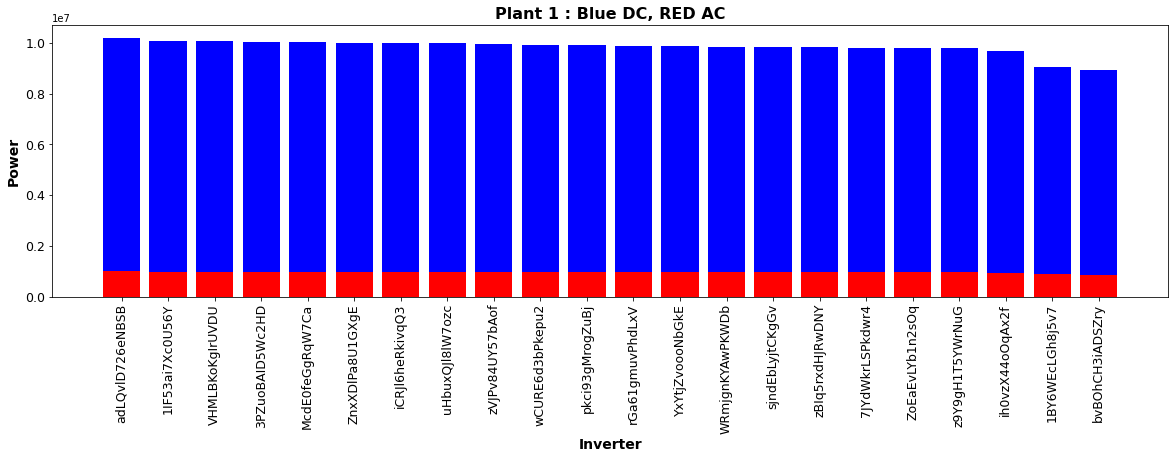

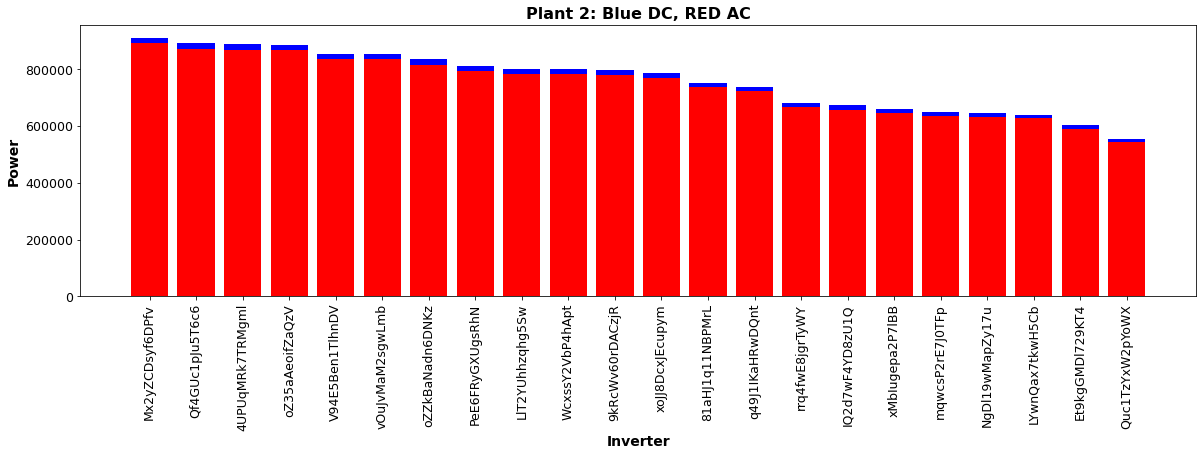

In [13]:
X=[]
for Inverter in INP1_Total["SOURCE_KEY"]:
    X.append(Inverter)    
Y =[]
for dcpower in INP1_Total['DC_POWER']:
    Y.append(dcpower)
Y1= []        
for acpower in INP1_Total['AC_POWER']:
    Y1.append(acpower)    
    
X2=[]
for Inverter in INP2_Total["SOURCE_KEY"]:
    X2.append(Inverter)    
Y2 =[]
for dcpower in INP2_Total['DC_POWER']:
    Y2.append(dcpower)
Y12= []        
for acpower in INP2_Total['AC_POWER']:
    Y12.append(acpower)       
#Plant 1    
plt.figure(figsize=(20,5))
plt.bar(X,Y, color = 'blue')
plt.bar(X,Y1, color = 'red')
plt.xticks(rotation = 90,fontsize = 12.5)
plt.yticks(fontsize = 12.5)
plt.xlabel('Inverter',fontsize = 14,fontweight = 'bold')
plt.ylabel('Power',fontsize = 14,fontweight = 'bold')
plt.title('Plant 1 : Blue DC, RED AC',fontsize = 16,fontweight = 'bold')
plt.show()

#Plant 2
plt.figure(figsize=(20,5))
plt.bar(X2,Y2, color = 'blue')
plt.bar(X2,Y12, color = 'red')
plt.xticks(rotation = 90, fontsize = 12.5)
plt.yticks(fontsize = 12.5)
plt.xlabel('Inverter',fontsize = 14,fontweight = 'bold')
plt.ylabel('Power',fontsize = 14,fontweight = 'bold')
plt.title('Plant 2: Blue DC, RED AC',fontsize = 16,fontweight = 'bold')
plt.show()

Note: In Plant 1, it looks like there isnt a full conversion between DC power given from the solar cells and the AC power through the inverter. From a Engineering point of view, this can be a couple things. 1. Sensor not taking the correct information. 2. Data is off by a factor. 3. The inverters are performing inefficiently 

##### 10. Investigate Plant 1 Conversion Issue. - Factor Check, due to Sensor issue. 

In [14]:
# Calculate Efficiency of Inverters
#https://www.e-education.psu.edu/eme812/node/738#:~:text=See%20if%20you%20can%20estimate,%25%20power%20%CE%B7%3D95%25.
# n = Power(AC)/Power(DC) 
INP1_Total['Eff'] = INP1_Total["AC_POWER"]/INP1_Total["DC_POWER"]
INP2_Total['Eff'] = INP2_Total["AC_POWER"]/INP2_Total["DC_POWER"]

INP1_Total

,SOURCE_KEY,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,Eff
0,adLQvlD726eNBSB,12897068119,1.019778e+07,997125.156663,1.060362e+07,1.996925e+10,0.097779
1,1IF53ai7Xc0U56Y,12897068119,1.006294e+07,984007.153452,1.047012e+07,1.969052e+10,0.097785
2,VHMLBKoKgIrUVDU,12954958133,1.005725e+07,983449.000642,1.067493e+07,2.298201e+10,0.097785
3,3PZuoBAID5Wc2HD,12892933118,1.004313e+07,982068.208928,1.046668e+07,2.219085e+10,0.097785
4,McdE0feGgRqW7Ca,12917743124,1.003212e+07,981080.708217,1.037773e+07,2.276640e+10,0.097794
5,ZnxXDlPa8U1GXgE,12942553130,9.997405e+06,977644.316190,1.057318e+07,2.081658e+10,0.097790
6,iCRJl6heRkivqQ3,12921878125,9.987733e+06,976688.499523,1.035826e+07,2.283022e+10,0.097789
7,uHbuxQJl8lW7ozc,12921878125,9.985363e+06,976462.011390,1.034688e+07,2.239463e+10,0.097789
8,zVJPv84UY57bAof,12917743124,9.956927e+06,973677.901192,1.030234e+07,2.262740e+10,0.097789
9,wCURE6d3bPkepu2,12926013126,9.911622e+06,969260.200356,1.018066e+07,2.159978e+10,0.097790


In [15]:
INP2_Total

,SOURCE_KEY,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,Eff
0,Mx2yZCDsyf6DPfv,13214523195,910617.270808,890317.270321,1.217270e+07,8.178637e+09,0.977707
1,Qf4GUc1pJu5T6c6,13214523195,890596.324322,870755.655462,1.159810e+07,2.655530e+12,0.977722
2,4UPUqMRk7TRMgml,13214523195,887444.875348,867688.151550,1.323824e+07,8.072359e+09,0.977738
3,oZ35aAeoifZaQzV,13214523195,885151.874261,865435.791964,1.167707e+07,5.260035e+12,0.977726
4,V94E5Ben1TlhnDV,13479227259,854375.668930,835443.639984,9.584165e+06,4.566119e+12,0.977841
5,vOuJvMaM2sgwLmb,13479227259,854172.894243,835012.155241,1.145212e+07,7.467966e+09,0.977568
6,oZZkBaNadn6DNKz,13479227259,834046.999676,815637.897502,9.449441e+06,5.525132e+12,0.977928
7,PeE6FRyGXUgsRhN,13479227259,810478.778457,792664.868701,1.081828e+07,4.359407e+12,0.978021
8,LlT2YUhhzqhg5Sw,13479227259,800062.652611,782521.577770,1.036492e+07,9.146277e+11,0.978075
9,WcxssY2VbP4hApt,13479227259,799350.243035,781608.549098,1.050483e+07,5.408026e+11,0.977805


Comparing the Efficiencies from Plant 1 and 2, it is off by a factor of 10. The DC Power is higher by a factor of 10 compared to plant 2, so we will apply the fix by dividing plant 1's DC Power by 10 and recalcualate. 

In [16]:
#CORRECTION OF DC POWER IN PLANT 1
INP1_Total['DC_POWER']= INP1_Total['DC_POWER'].astype('float')/10
INP1_Total['Eff'] = INP1_Total["AC_POWER"]/INP1_Total["DC_POWER"]
X=[]
for Inverter in INP1_Total["SOURCE_KEY"]:
    X.append(Inverter)    
Y =[]
for dcpower in INP1_Total['DC_POWER']:
    Y.append(dcpower)
Y1= []        
for acpower in INP1_Total['AC_POWER']:
    Y1.append(acpower)    
    
X2=[]
for Inverter in INP2_Total["SOURCE_KEY"]:
    X2.append(Inverter)    
Y2 =[]
for dcpower in INP2_Total['DC_POWER']:
    Y2.append(dcpower)
Y12= []        
for acpower in INP2_Total['AC_POWER']:
    Y12.append(acpower) 

In [17]:
INP2_Total

,SOURCE_KEY,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,Eff
0,Mx2yZCDsyf6DPfv,13214523195,910617.270808,890317.270321,1.217270e+07,8.178637e+09,0.977707
1,Qf4GUc1pJu5T6c6,13214523195,890596.324322,870755.655462,1.159810e+07,2.655530e+12,0.977722
2,4UPUqMRk7TRMgml,13214523195,887444.875348,867688.151550,1.323824e+07,8.072359e+09,0.977738
3,oZ35aAeoifZaQzV,13214523195,885151.874261,865435.791964,1.167707e+07,5.260035e+12,0.977726
4,V94E5Ben1TlhnDV,13479227259,854375.668930,835443.639984,9.584165e+06,4.566119e+12,0.977841
5,vOuJvMaM2sgwLmb,13479227259,854172.894243,835012.155241,1.145212e+07,7.467966e+09,0.977568
6,oZZkBaNadn6DNKz,13479227259,834046.999676,815637.897502,9.449441e+06,5.525132e+12,0.977928
7,PeE6FRyGXUgsRhN,13479227259,810478.778457,792664.868701,1.081828e+07,4.359407e+12,0.978021
8,LlT2YUhhzqhg5Sw,13479227259,800062.652611,782521.577770,1.036492e+07,9.146277e+11,0.978075
9,WcxssY2VbP4hApt,13479227259,799350.243035,781608.549098,1.050483e+07,5.408026e+11,0.977805


In [18]:
INP1_Total

,SOURCE_KEY,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,Eff
0,adLQvlD726eNBSB,12897068119,1.019778e+06,997125.156663,1.060362e+07,1.996925e+10,0.977786
1,1IF53ai7Xc0U56Y,12897068119,1.006294e+06,984007.153452,1.047012e+07,1.969052e+10,0.977852
2,VHMLBKoKgIrUVDU,12954958133,1.005725e+06,983449.000642,1.067493e+07,2.298201e+10,0.977851
3,3PZuoBAID5Wc2HD,12892933118,1.004313e+06,982068.208928,1.046668e+07,2.219085e+10,0.977851
4,McdE0feGgRqW7Ca,12917743124,1.003212e+06,981080.708217,1.037773e+07,2.276640e+10,0.977939
5,ZnxXDlPa8U1GXgE,12942553130,9.997405e+05,977644.316190,1.057318e+07,2.081658e+10,0.977898
6,iCRJl6heRkivqQ3,12921878125,9.987733e+05,976688.499523,1.035826e+07,2.283022e+10,0.977888
7,uHbuxQJl8lW7ozc,12921878125,9.985363e+05,976462.011390,1.034688e+07,2.239463e+10,0.977893
8,zVJPv84UY57bAof,12917743124,9.956927e+05,973677.901192,1.030234e+07,2.262740e+10,0.977890
9,wCURE6d3bPkepu2,12926013126,9.911622e+05,969260.200356,1.018066e+07,2.159978e+10,0.977903


#### 11. Generate a Visual which has Ranked Inverters based on Power and Efficiency

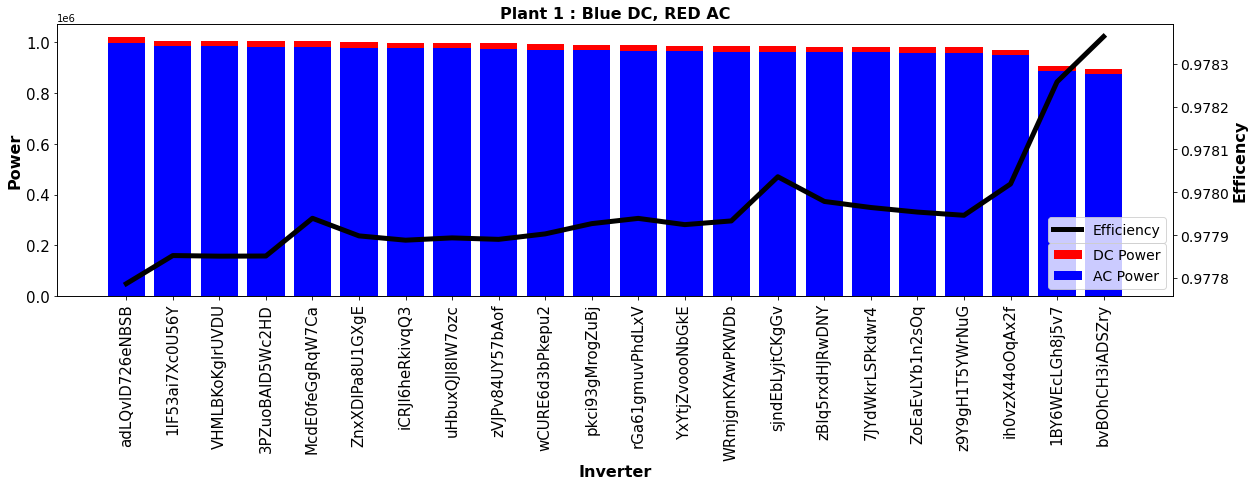

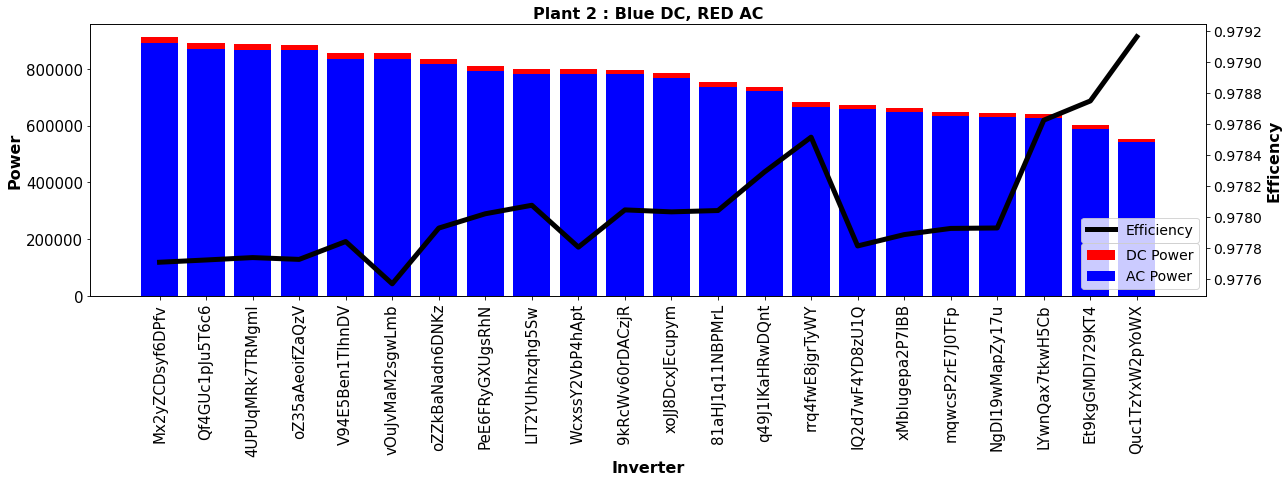

In [19]:
fig,ax = plt.subplots(figsize=(20,5))
ax.bar(X,Y, color="red", label = "DC Power")
ax.bar(X,Y1,color='blue',label = "AC Power")
ax.set_xlabel("Inverter",fontsize = 16,fontweight = 'bold')
ax.set_ylabel("Power",fontsize = 16,fontweight = 'bold')
ax.set_title('Plant 1 : Blue DC, RED AC',fontsize = 16,fontweight = 'bold')
ax.tick_params(labelrotation=90, labelsize=15, axis = 'x')
ax.tick_params(labelsize=15, axis = 'y')
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(X,INP1_Total['Eff'],color="black",label = "Efficiency",linewidth = 5)
ax2.set_ylabel("Efficency",fontsize = 16,fontweight = 'bold')
ax2.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize = 14, loc = 4)
ax2.legend(fontsize = 14, bbox_to_anchor=(1, .315))
plt.show()


fig,ax = plt.subplots(figsize=(20,5))
ax.bar(X2,Y2, color="red", label = "DC Power")
ax.bar(X2,Y12,color='blue',label = "AC Power")
ax.set_xlabel("Inverter",fontsize = 16,fontweight = 'bold')
ax.set_ylabel("Power",fontsize = 16,fontweight = 'bold')
ax.set_title('Plant 2 : Blue DC, RED AC',fontsize = 16,fontweight = 'bold')
ax.tick_params(labelrotation=90, labelsize=15, axis = 'x')
ax.tick_params(labelsize=15, axis = 'y')
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(X2,INP2_Total['Eff'],color="black",label = "Efficiency", linewidth = 5)
ax2.set_ylabel("Efficency",fontsize = 16,fontweight = 'bold')
ax2.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize = 14, loc = 4)
ax2.legend(fontsize = 14, bbox_to_anchor=(1, .315))
plt.show()




The best inverter in Plant 1 is adLQvlD726eNBSB - DC: 1.019778e+06 AC:997125.156663 Eff:0.977786 \
The best inverter in Plant 2 is Mx2yZCDsyf6DPfv - DC: 910617.270808 AC:890317.270321 Eff:0.977707

##### 12. What is the maximum/minimum amount of DC/AC Power generated in a time interval/day?

In [20]:

P1['DC_POWER'] = P1["DC_POWER"]/10
P1

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,Month,DAY,Date,Time
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,05,15,05-15,00:00
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,05,15,05-15,00:00
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,05,15,05-15,00:00
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,05,15,05-15,00:00
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,05,15,05-15,00:00
...,...,...,...,...,...,...,...,...,...,...,...
68773,17-06-2020 23:45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,06,17,06-17,23:45
68774,17-06-2020 23:45,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,06,17,06-17,23:45
68775,17-06-2020 23:45,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,06,17,06-17,23:45
68776,17-06-2020 23:45,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,06,17,06-17,23:45


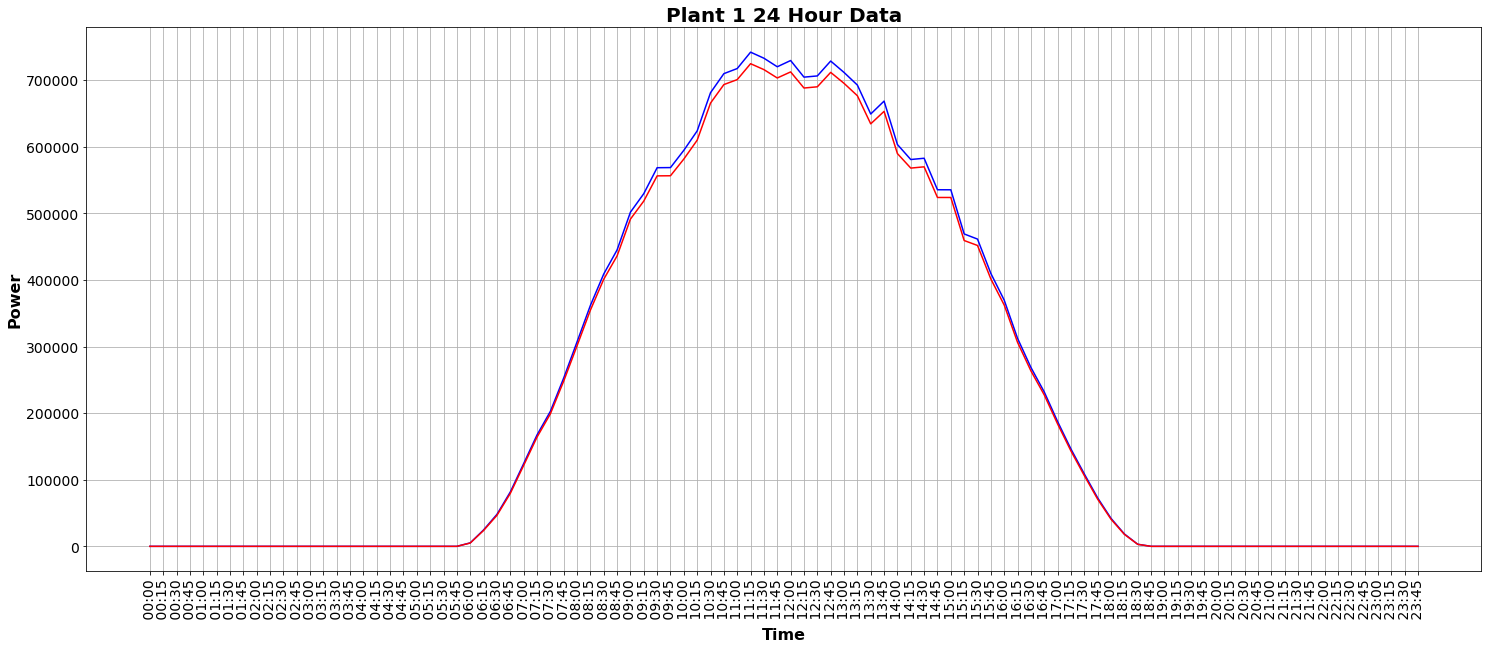

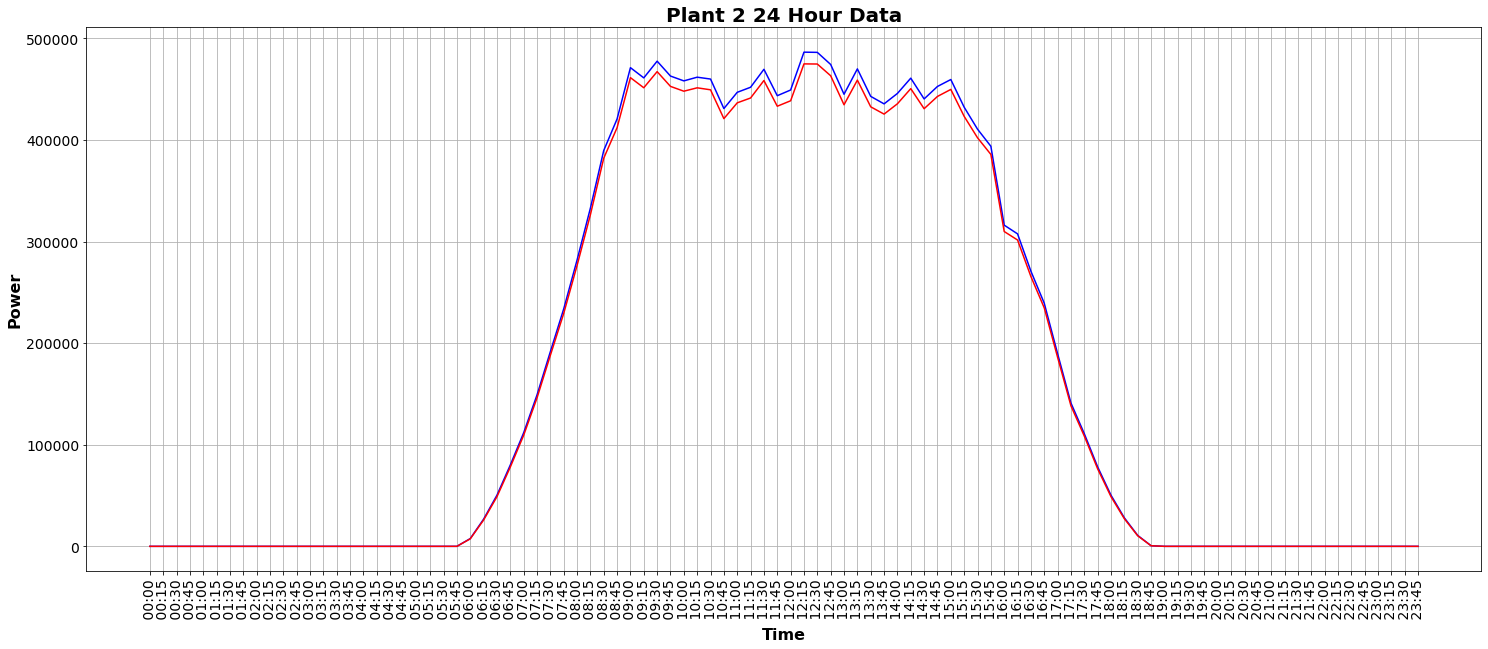

In [21]:
#  Lets see how each plant did in each day over a 24 hour period, broken up by 15 minute periods. 
DayP1= P1.groupby('Time').sum().reset_index()
DayP2= P2.groupby('Time').sum().reset_index()


plt.figure(figsize=(25,10))
plt.plot(DayP1['Time'],DayP1['DC_POWER'],color = "blue", label = 'DC POWER')
plt.plot(DayP1['Time'],DayP1['AC_POWER'],color = "red",label = "AC POWER")
plt.xticks(rotation = 90, fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Time', fontsize = 16, fontweight = "bold")
plt.ylabel("Power", fontsize = 16, fontweight = "bold")
plt.title('Plant 1 24 Hour Data', fontsize = 20, fontweight = 'bold')
plt.grid()
plt.show()

plt.figure(figsize=(25,10))
plt.plot(DayP2['Time'],DayP2['DC_POWER'],color = "blue", label = 'DC POWER')
plt.plot(DayP2['Time'],DayP2['AC_POWER'],color = "red",label = "AC POWER")
plt.xticks(rotation = 90, fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Time', fontsize = 16, fontweight = "bold")
plt.ylabel("Power", fontsize = 16, fontweight = "bold")
plt.title('Plant 2 24 Hour Data', fontsize = 20, fontweight = 'bold')
plt.grid()
plt.show()

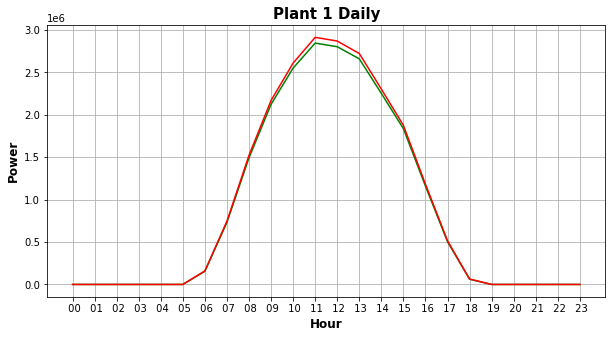

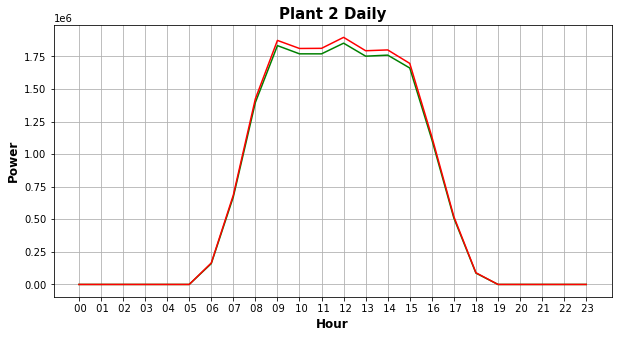

In [22]:
# Lets see how each plant did in each day over a 24 hour period, broken up by hours. 

#Plant 1 
P1['Hour'] =P1["Time"].str[0:3]
x = [Hour for Hour, P1 in P1.groupby('Hour')]
StatHourP1 = P1.groupby('Hour').sum()
y1 = StatHourP1['AC_POWER']
y2 = StatHourP1['DC_POWER']
plt.figure(figsize=(10,5))
plt.plot(x,y1,'g')
plt.plot(x,y2,'r')
plt.xlabel("Hour",fontsize = 12, fontweight = 'bold')
plt.ylabel('Power',fontsize = 12, fontweight = 'bold')
plt.title('Plant 1 Daily',fontsize = 15, fontweight = 'bold')
plt.xticks(x)
plt.grid()
plt.show()


#Plant 2
P2['Hour'] =P2["Time"].str[0:3]
x = [Hour for Hour, P2 in P2.groupby('Hour')]
StatHourP2 = P2.groupby('Hour').sum()
y12 = StatHourP2['AC_POWER']
y22 = StatHourP2['DC_POWER']
plt.figure(figsize=(10,5))
plt.plot(x,y12,'g')
plt.plot(x,y22,'r')
plt.xlabel("Hour", fontsize = 12, fontweight = 'bold')
plt.ylabel('Power',fontsize = 12, fontweight = 'bold')
plt.title('Plant 2 Daily',fontsize = 15, fontweight = 'bold')
plt.xticks(x)
plt.grid()
plt.show()

##### 12. Which Month Performed the best?

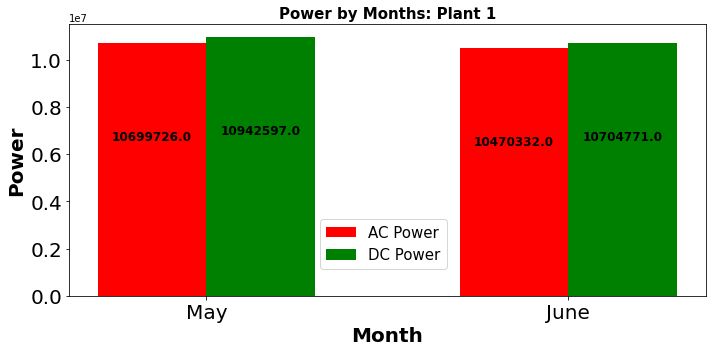

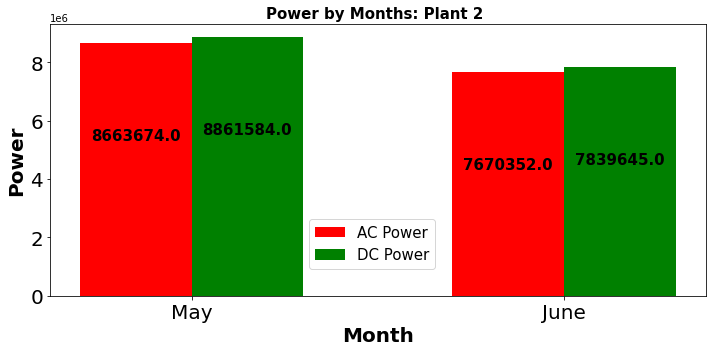

In [23]:
P1

Month = P1.groupby('Month').sum().round().reset_index()
Month2 = P2.groupby('Month').sum().round().reset_index()

labels = ["May","June"]


x = np.arange(len(labels))  # the label locations

width = 0.30  # the width of the bars



fig, ax = plt.subplots(figsize=(10,5))

rects1 = ax.bar(x - width/2,Month['AC_POWER'], width, label='AC Power',color = 'red')
rects2 = ax.bar(x + width/2, Month['DC_POWER'], width, label='DC Power', color = 'green')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Month', fontsize = 20, fontweight = 'bold')
ax.set_ylabel('Power', fontsize = 20, fontweight = 'bold')
ax.set_title('Power by Months: Plant 1', fontsize = 15, fontweight = 'bold')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.tick_params(labelsize = 20, axis='both')
ax.legend(fontsize = 15, loc = (.395,0.1))


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, -100),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize = 12,fontweight = 'bold')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


x = np.arange(len(labels))  # the label locations

width = 0.30  # the width of the bars



fig, ax = plt.subplots(figsize=(10,5))

rects1 = ax.bar(x - width/2,Month2['AC_POWER'], width, label='AC Power',color = 'red')
rects2 = ax.bar(x + width/2, Month2['DC_POWER'], width, label='DC Power', color = 'green')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Month', fontsize = 20, fontweight = 'bold')
ax.set_ylabel('Power', fontsize = 20, fontweight = 'bold')
ax.set_title('Power by Months: Plant 2 ', fontsize = 15, fontweight = 'bold')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.tick_params(labelsize = 20, axis='both')
ax.legend(fontsize = 15, loc = (.395,0.1))


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, -100),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize = 15,fontweight = 'bold')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

##### 13.Which day in May and June were the best?

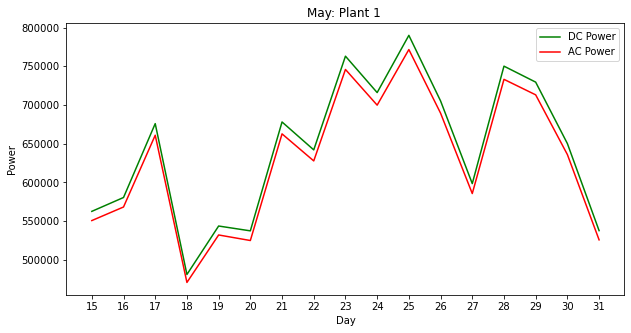

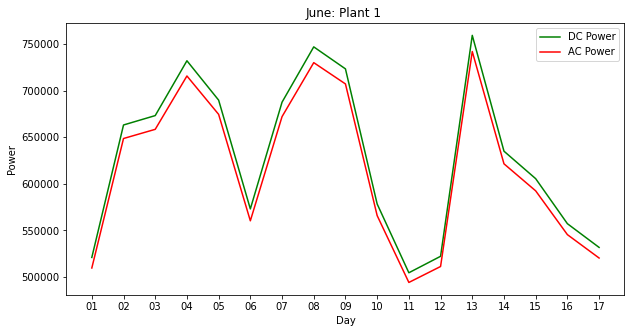

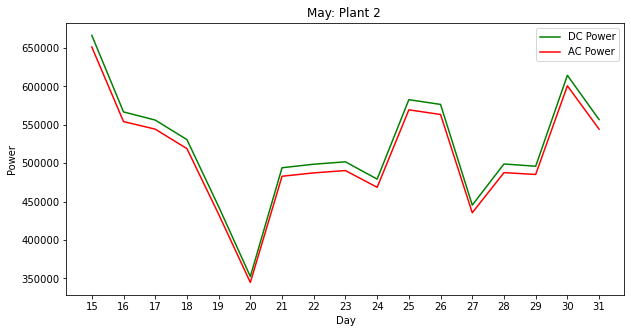

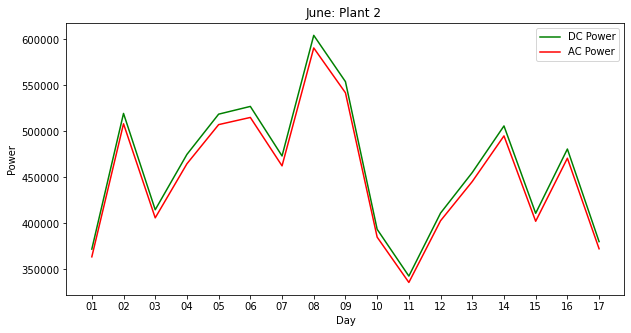

In [24]:
May = P1[P1["Month"]=="05"].groupby('DAY').sum().reset_index()
June = P1[P1["Month"]=="06"].groupby('DAY').sum().reset_index()

May

X = May["DAY"]
YDC = May['DC_POWER']
YAC = May['AC_POWER']
plt.figure(figsize=(10,5))
plt.plot(X,YDC,color = "green", label = "DC Power")
plt.plot(X,YAC,color = 'red', label = 'AC Power')
plt.xlabel('Day')
plt.ylabel('Power')
plt.title('May: Plant 1 ')
plt.legend()
plt.show()

June

X = June["DAY"]
YDC = June['DC_POWER']
YAC = June['AC_POWER']
plt.figure(figsize=(10,5))
plt.plot(X,YDC,color = "green", label = "DC Power")
plt.plot(X,YAC,color = 'red', label = 'AC Power')
plt.xlabel('Day')
plt.ylabel('Power')
plt.title('June: Plant 1 ')
plt.legend()
plt.show()

May2 = P2[P2["Month"]=="05"].groupby('DAY').sum().reset_index()
June2 = P2[P2["Month"]=="06"].groupby('DAY').sum().reset_index()

May

X2 = May2["DAY"]
YDC2 = May2['DC_POWER']
YAC2 = May2['AC_POWER']
plt.figure(figsize=(10,5))
plt.plot(X2,YDC2,color = "green", label = "DC Power")
plt.plot(X2,YAC2,color = 'red', label = 'AC Power')
plt.xlabel('Day')
plt.ylabel('Power')
plt.title('May: Plant 2 ')
plt.legend()
plt.show()

June

XJ2 = June2["DAY"]
YDCJ2 = June2['DC_POWER']
YACJ2 = June2['AC_POWER']
plt.figure(figsize=(10,5))
plt.plot(XJ2,YDCJ2,color = "green", label = "DC Power")
plt.plot(XJ2,YACJ2,color = 'red', label = 'AC Power')
plt.xlabel('Day')
plt.ylabel('Power')
plt.title('June: Plant 2 ')
plt.legend()
plt.show()







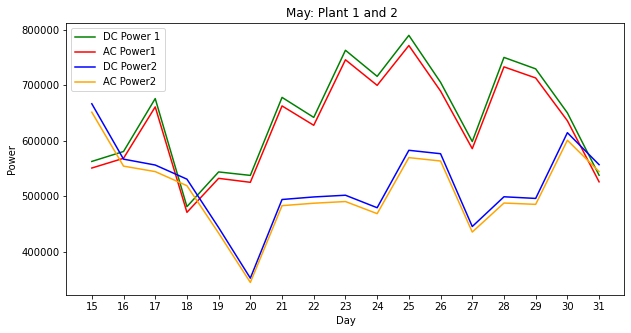

In [25]:
May

X = May["DAY"]
YDC = May['DC_POWER']
YAC = May['AC_POWER']
plt.figure(figsize=(10,5))
plt.plot(X,YDC,color = "green", label = "DC Power 1")
plt.plot(X,YAC,color = 'red', label = 'AC Power1')
plt.plot(X2,YDC2,color = "blue", label = "DC Power2")
plt.plot(X2,YAC2,color = 'orange', label = 'AC Power2')
plt.xlabel('Day')
plt.ylabel('Power')
plt.title('May: Plant 1 and 2  ')
plt.legend()


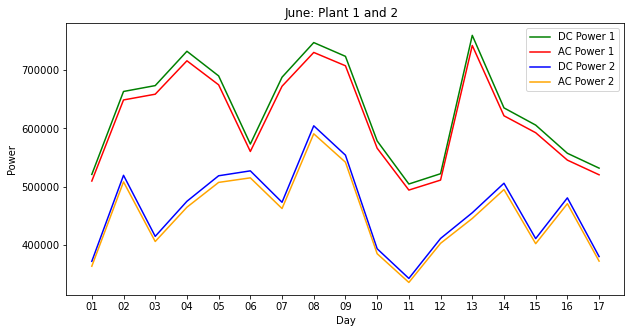

In [26]:
X = June["DAY"]
YDC = June['DC_POWER']
YAC = June['AC_POWER']
plt.figure(figsize=(10,5))
plt.plot(X,YDC,color = "green", label = "DC Power 1")
plt.plot(X,YAC,color = 'red', label = 'AC Power 1')
plt.plot(XJ2,YDCJ2,color = "blue", label = "DC Power 2")
plt.plot(XJ2,YACJ2,color = 'orange', label = 'AC Power 2')
plt.xlabel('Day')
plt.ylabel('Power')
plt.title('June: Plant 1 and 2  ')
plt.legend()
plt.show()

##### 14.What is the total irradiation per day?

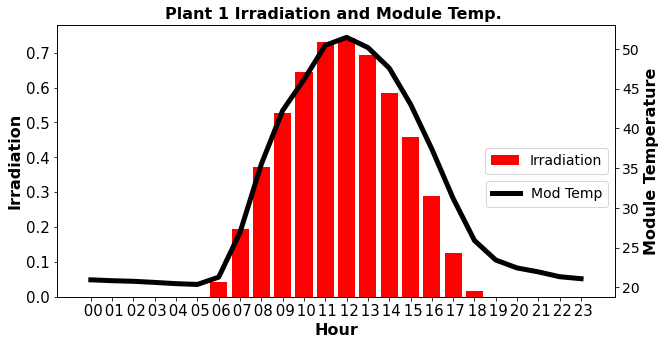

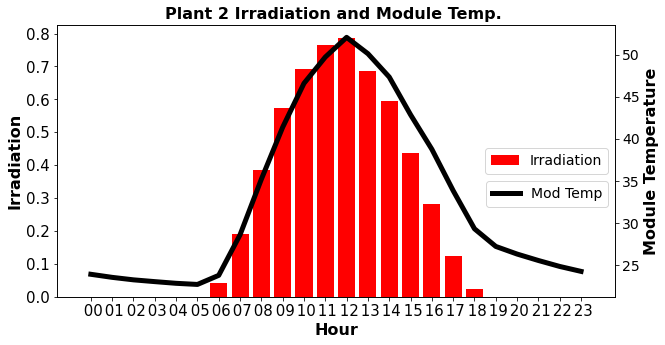

In [27]:

WP1["Month"] = WP1['DATE_TIME'].astype(str).str[5:7]
WP1["DAY"] = WP1["DATE_TIME"].str[8:10]
WP1["Date"]= WP1['Month'] + '-' + WP1['DAY']
WP1['Time'] = WP1["DATE_TIME"].astype(str).str[10:16]
WP1['Hour'] = WP1["DATE_TIME"].astype(str).str[10:13]
WP2["Month"] = WP2['DATE_TIME'].astype(str).str[5:7]
WP2["DAY"] = WP2["DATE_TIME"].str[8:10]
WP2["Date"]= WP2['Month'] + '-' + WP2['DAY']
WP2['Time'] = WP2["DATE_TIME"].astype(str).str[10:16]
WP2['Hour'] = WP2["DATE_TIME"].astype(str).str[10:13]


Day=WP1.groupby("Hour").mean().reset_index()
Day2=WP2.groupby("Hour").mean().reset_index()




fig,ax = plt.subplots(figsize=(10,5))
ax.bar(Day['Hour'],Day['IRRADIATION'], color="red", label = "Irradiation")
ax.set_xlabel("Hour",fontsize = 16,fontweight = 'bold')
ax.set_ylabel("Irradiation",fontsize = 16,fontweight = 'bold')
ax.set_title('Plant 1 Irradiation and Module Temp. ',fontsize = 16,fontweight = 'bold')
ax.tick_params( labelsize=15, axis = 'x')
ax.tick_params(labelsize=15, axis = 'y')
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(Day['Hour'],Day['MODULE_TEMPERATURE'],color="black",label = "Mod Temp", linewidth = 5)
ax2.set_ylabel("Module Temperature",fontsize = 16,fontweight = 'bold')
ax2.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize = 14, loc = 5)
ax2.legend(fontsize = 14, bbox_to_anchor=(1, .45))
plt.show()


fig,ax = plt.subplots(figsize=(10,5))
ax.bar(Day2['Hour'],Day2['IRRADIATION'], color="red", label = "Irradiation")
ax.set_xlabel("Hour",fontsize = 16,fontweight = 'bold')
ax.set_ylabel("Irradiation",fontsize = 16,fontweight = 'bold')
ax.set_title('Plant 2 Irradiation and Module Temp. ',fontsize = 16,fontweight = 'bold')
ax.tick_params( labelsize=15, axis = 'x')
ax.tick_params(labelsize=15, axis = 'y')
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(Day2['Hour'],Day2['MODULE_TEMPERATURE'],color="black",label = "Mod Temp", linewidth = 5)
ax2.set_ylabel("Module Temperature",fontsize = 16,fontweight = 'bold')
ax2.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize = 14, loc = 5)
ax2.legend(fontsize = 14, bbox_to_anchor=(1, .45))
plt.show()






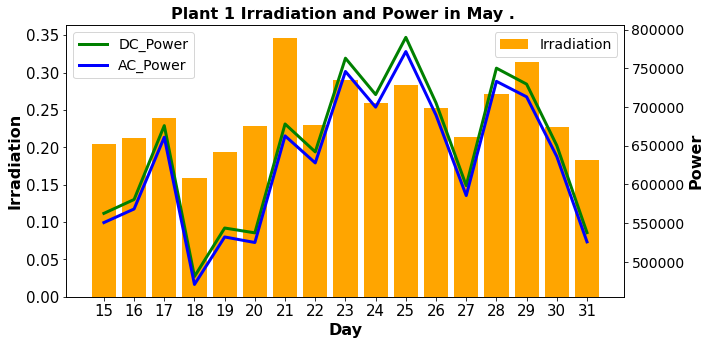

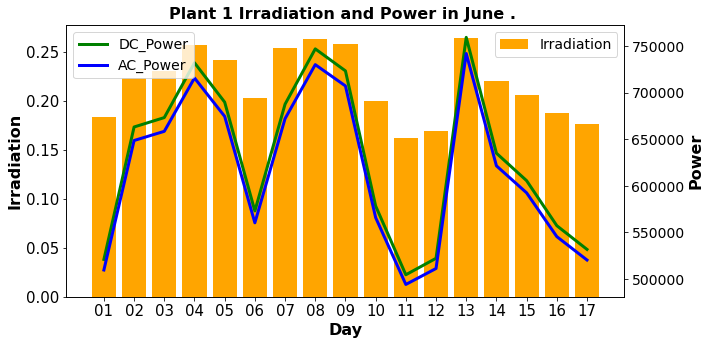

In [52]:
May_W1 = WP1[WP1['Month']=='05'].groupby("DAY").mean().reset_index()
June_W1 = WP1[WP1['Month']=='06'].groupby('DAY').mean().reset_index()

May = P1[P1["Month"]=="05"].groupby('DAY').sum().reset_index()
June = P1[P1["Month"]=="06"].groupby('DAY').sum().reset_index()

May

X = May["DAY"]
YDC = May['DC_POWER']
YAC = May['AC_POWER']


fig,ax = plt.subplots(figsize=(10,5))
ax.bar(May_W1['DAY'],May_W1['IRRADIATION'], color="orange", label = "Irradiation")
ax.set_xlabel("Day",fontsize = 16,fontweight = 'bold')
ax.set_ylabel("Irradiation",fontsize = 16,fontweight = 'bold')
ax.set_title('Plant 1 Irradiation and Power in May . ',fontsize = 16,fontweight = 'bold')
ax.tick_params( labelsize=15, axis = 'x')
ax.tick_params(labelsize=15, axis = 'y')
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(X,YDC,color="green",label = "DC_Power",linewidth = 3)
ax2.plot(X,YAC,color = 'blue', label = 'AC_Power',linewidth = 3)
ax2.set_ylabel("Power",fontsize = 16,fontweight = 'bold')
ax2.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize = 14, loc = 1)
ax2.legend(fontsize = 14, loc = 2)
plt.show()

X = June["DAY"]
YDC = June['DC_POWER']
YAC = June['AC_POWER']

fig,ax = plt.subplots(figsize=(10,5))
ax.bar(June_W1['DAY'],June_W1['IRRADIATION'], color="orange", label = "Irradiation")
ax.set_xlabel("Day",fontsize = 16,fontweight = 'bold')
ax.set_ylabel("Irradiation",fontsize = 16,fontweight = 'bold')
ax.set_title('Plant 1 Irradiation and Power in June . ',fontsize = 16,fontweight = 'bold')
ax.tick_params( labelsize=15, axis = 'x')
ax.tick_params(labelsize=15, axis = 'y')
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(X,YDC,color="green",label = "DC_Power", linewidth = 3)
ax2.plot(X,YAC,color = 'blue', label = 'AC_Power',linewidth = 3)
ax2.set_ylabel("Power",fontsize = 16,fontweight = 'bold')
ax2.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize = 14, loc = 1)
ax2.legend(fontsize = 14, loc = 2)
plt.show()



In [47]:
June_W1

<bound method DataFrame.reset_index of      PLANT_ID  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
DAY                                                                
01    4135001            24.779514           28.961083     0.183846
02    4135001            24.374920           29.448151     0.223788
03    4135001            24.795672           29.998063     0.230818
04    4135001            25.286176           31.221625     0.256989
05    4135001            24.870622           30.582565     0.241590
06    4135001            24.247355           28.802772     0.203405
07    4135001            25.016090           31.497892     0.254191
08    4135001            25.441268           31.621923     0.263703
09    4135001            25.545736           31.515744     0.257861
10    4135001            24.752468           29.202542     0.200336
11    4135001            24.403410           27.880257     0.161809
12    4135001            24.072379           27.585834     0.169808
13    413